# Проект: Анализ инвестиционной привлекательности стартапов для стратегий покупки и перепродажи

## Введение

### Цели и задачи проекта

Подготовить и проанализировать исторические данные о стартапах с целью оценки качества информации, выявления закономерностей, связанных с успешными сделками, и формирования рекомендаций для принятия инвестиционных решений.

### Описание данных

Таблица `acquisition` содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

Таблица `company_and_rounds` содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Таблица `education` содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Таблица `people` содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Таблица `degrees` содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

Таблица `fund` содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

Таблица `investment` содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

### Содержимое проекта

1. [Знакомство с данными: загрузка и первичная предобработка](#section1)
- [Вывод общей информации, исправление названия столбцов](#section1)
- [Смена типов и анализ пропусков](#section2)
2. [Предобработка данных, предварительное исследование](#section3)
- [Раунды финансирования по годам](#section4)
- [Люди и их образование](#section5)
- [Объединять или не объединять — вот в чём вопрос](#section6)
- [Проблемный датасет и причина возникновения пропусков](#section7)
3. [Исследовательский анализ объединённых таблиц](#section8)
- [Объединение данных](#section9)
- [Анализ выбросов](#section10)
- [Куплены забесплатно?](#section11)
- [Цены стартапов по категориям](#section12)
- [Сколько раундов продержится стартап перед покупкой](#section13)
4. [Итоговый вывод и рекомендации](#section14)

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).

Чтобы ваше исследование шло оптимальным путём, рекомендуем чётко следовать предложенным дальше шагам. Углублённая предобработка и исследование неприоритетных для проекта вопросов может потребовать много дополнительного времени.

В процессе работы старайтесь записывать свои рассуждения — это полезная привычка во время обучения. Пользуйтесь общими правилами:

- начните с введения, в котором опишите контекст и цели проекта в целом;
- записывайте в комментариях к коду всё, что относится к нему или алгоритму;
- основания совершаемых в проекте действий и выводы, которые касаются предмета исследования, — записывайте в ячейках типа Markdown;
- после каждого крупного раздела — шага проекта — обязательно формулируйте промежуточные выводы.

<a id="section1"></a>
## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загрузка данных
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [3]:
def dataset_info(df, name):
    print(f'\n=== {name} ===')
    print('Первые 5 строк:')
    display(df.head())
    print('\nИнформация о датасете:')
    print(df.info())
    
    print('\nПропущенные значения:')
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = pd.DataFrame({
        'Пропущено': missing_values,
        '% пропущенных': missing_percentage.round(2)
    })
    print(missing_data)
    
    print('\nУникальные значения для категориальных столбцов:')
    for col in df.select_dtypes(include=['object']).columns:
        print(f"{col}: {df[col].nunique()} уникальных значений")

# Вывод информации о каждом датасете
dataset_info(acquisition, 'Acquisition')
dataset_info(company_and_rounds, 'Company and Rounds')
dataset_info(people, 'People')
dataset_info(education, 'Education')
dataset_info(degrees, 'Degrees')
dataset_info(fund, 'Fund')
dataset_info(investment, 'Investment')


=== Acquisition ===
Первые 5 строк:


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB
None

Пропущенные значения:
                      Пропущено  % пропущенных
id                            0           0.00
acquiring_company_id          0           0.00
acquired_company_id           0           0.00
term_code                  7576          80.54
price_amount                  0           0.00
acquired_at                  29           0.31

Уникальные значения для категориальных столбцов:
term_code: 

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id 

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB
None

Пропущенные значения:
                  Пропущено  % пропущенных
id                        0           0.00
first_name                5           0.00
last_name                 1           0.00
company_id           192094          84.73
network_username     187842          82.86

Уникальные значения для категориальных столбцов:
first_name: 28422 уникальных значений
last_name: 107772 уникальных значений
network_username: 38421 уникальных значений

=== Educati

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB
None

Пропущенные значения:
              Пропущено  % пропущенных
id                    0           0.00
person_id             0           0.00
instituition         55           0.05
graduated_at      51556          47.04

Уникальные значения для категориальных столбцов:
instituition: 21067 уникальных значений
graduated_at: 71 уникальных значений

=== Degrees ===
Первые 5 строк:


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB
None

Пропущенные значения:
             Пропущено  % пропущенных
id                   0           0.00
object_id            0           0.00
degree_type      11218          10.23
subject          28312          25.83

Уникальные значения для категориальных столбцов:
object_id: 68451 уникальных значений
degree_type: 7148 уникальных значений
subject: 20050 уникальных значений

=== Fund ===
Первые 5 строк:


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB
None

Пропущенные значения:
                    Пропущено  % пропущенных
id                          0           0.00
name                        2           0.02
founded_at               7047          60.48
domain                   4290          36.82
network_username         9503      

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB
None

Пропущенные значения:
                  Пропущено  % пропущенных
id                        0            0.0
funding_round_id          0            0.0
company_id                0            0.0
fund_id                   0            0.0

Уникальные значения для категориальных столбцов:


In [4]:
print(company_and_rounds.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


In [5]:
# Заменяем двойные пробелы на подчеркивания
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ', '_')
# Проверяем результат
print(company_and_rounds.columns.tolist())

['company_ID', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']


1. ***Acquisition*** (Покупки компаний)
    - Основные данные: 9,407 сделок, информация о покупателе, продаваемой компании, сумме и дате сделки.
    - Проблемы:
        - term_code (условия сделки) пропущен в 80% строк (7,576 из 9,407).
        - acquired_at (дата сделки) пропущена в 29 случаях.
        - term_code имеет всего 3 уникальных значения (вероятно, cash, stock, mixed).

2. ***Company and Rounds*** (Компании и раунды финансирования)
    - Основные данные: 217,774 записи, но много дубликатов и пропусков.
    - Проблемы:
        - 302 пропуска в company ID и name.
        - category code (сфера деятельности) пропущен в 73,888 случаях.
        - founded_at (дата основания) отсутствует в 107,818 записях.
        - closed_at (дата закрытия) заполнена только для 3,449 компаний.
        - 164,846 пропусков в данных о раундах финансирования (funding_round_id, raised_amount и др.).

3. ***People*** (Сотрудники)
    - Основные данные: 226,709 записей о людях.
    - Проблемы:
        - company_id (привязка к компании) отсутствует в 192,094 случаях (85% данных!).
        - network_username (ник в соцсетях) заполнен только для 17% записей.
        - Есть 5 пропусков в first_name и 1 в last_name.

4. ***Education*** (Образование)
    - Основные данные: 109,610 записей об образовании.
    - Проблемы:
        - graduated_at (дата окончания) пропущена в 51,556 случаях (47%).
        - instituition (учебное заведение) отсутствует в 55 записях.

5. ***Degrees*** (Степени образования)
    - Основные данные: 109,610 записей (видимо, связаны с education).
    - Проблемы:
        - degree_type пропущен в 11,218 случаях.
        - subject (специальность) отсутствует в 28,312 записях.

6. ***Fund*** (Фонды)
    - Основные данные: 11,652 фонда.
    - Проблемы:
        - founded_at (дата основания) отсутствует в 7,047 случаях (60%).
        - network_username (ник в соцсетях) заполнен только для 18% фондов.
        - 2 пропуска в name (можно удалить).

7. ***Investment*** (Инвестиции)
    - Основные данные: 61,403 записи, связь между раундами, компаниями и фондами.
    - Проблемы:
        - Нет пропусков – это самый чистый датасет.

<a id="section2"></a>
### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [6]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')  # errors='coerce' превратит некорректные даты в NaT

education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce', format='%Y-%m-%d')

fund['founded_at'] = pd.to_datetime(fund['founded_at'], errors='coerce')

In [7]:
date_columns = ['founded_at', 'closed_at', 'funded_at']
for col in date_columns:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col], errors='coerce')

1. ***Acquisition*** (Покупки компаний)
- Полнота данных: Хорошая, кроме term_code (условия сделки пропущены в 80.5% случаев).
- Вывод: Данных достаточно для анализа суммы и дат сделок, но недостаточно для анализа условий сделок.

2. ***Company and Rounds*** (Компании и финансирование)
- Проблемы:
    - founded_at (дата основания) пропущена в 49.5% случаев.
    - Данные о раундах финансирования (funding_round_id, raised_amount и др.) отсутствуют в 75-76% записей.
    - closed_at (дата закрытия) заполнена только для 1.58% компаний.
- Вывод: Данных недостаточно для глубокого анализа финансирования. Можно анализировать только компании с заполненными данными (24-25% записей).

3. ***People*** (Сотрудники)
- Основная проблема: company_id отсутствует в 84.7% записей.
- Вывод: Данных недостаточно для анализа связи сотрудников с компаниями. Можно использовать только 15.3% записей.

4. ***Education*** (Образование)
- Проблемы: graduated_at (дата окончания) пропущена в 47% случаев.
- Вывод: Данных достаточно для анализа учебных заведений, но не для анализа временных периодов образования.

5. ***Degrees*** (Степени образования)
- Проблемы: subject (специальность) пропущена в 25.8% случаев.
- Вывод: Данных достаточно для общего анализа, но с ограничениями.

6. ***Fund*** (Фонды)
- Проблемы: founded_at (дата основания) пропущена в 60.5% случаев.
- Вывод: Данных достаточно для анализа активности фондов, но не для анализа их истории.

7. ***Investment*** (Инвестиции)
- Полнота данных: Идеальная, пропусков нет.
- Вывод: Лучший датасет для анализа инвестиционных раундов.

<a id="section3"></a>
## Шаг 2. Предобработка данных, предварительное исследование

<a id="section4"></a>
### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

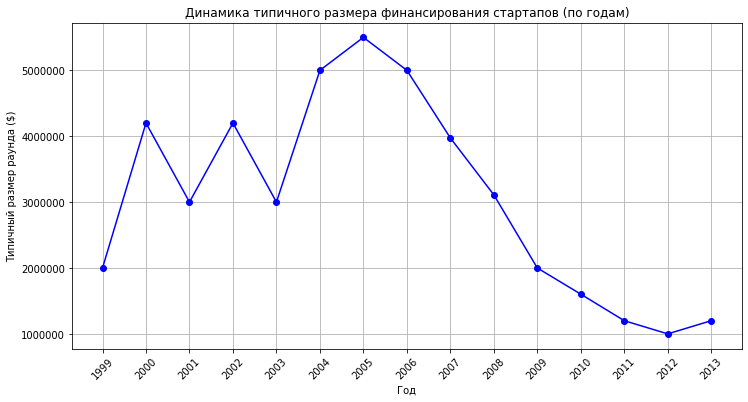

,typical_round,rounds_count
funded_year,,
2013.0,1200000.0,11072
2012.0,1000000.0,9970
2011.0,1200000.0,9204
2010.0,1602500.0,6221
2009.0,2000000.0,4151
2008.0,3110000.0,3774
2007.0,3973320.0,3279
2006.0,5000000.0,2436
2005.0,5500000.0,1633


In [8]:
# Извлекаем год из даты финансирования
company_and_rounds['funded_year'] = company_and_rounds['funded_at'].dt.year

# Фильтруем данные: только строки с указанной суммой финансирования
funding_data = company_and_rounds.dropna(subset=['raised_amount', 'funded_year'])

# Создаем сводную таблицу
pivot_table = funding_data.groupby('funded_year').agg(
    typical_round=('raised_amount', 'median'),  # Медиана как типичный размер
    rounds_count=('raised_amount', 'count')     # Количество раундов
)

# Фильтруем годы с >50 раундами
filtered_pivot = pivot_table[pivot_table['rounds_count'] > 50]

# Строим график
plt.figure(figsize=(12, 6))
filtered_pivot['typical_round'].plot(kind='line', marker='o', color='b')
plt.title('Динамика типичного размера финансирования стартапов (по годам)')
plt.xlabel('Год')
plt.ylabel('Типичный размер раунда ($)')
plt.grid(True)
plt.xticks(filtered_pivot.index, rotation=45)
plt.ticklabel_format(axis='y', style='plain')  # Отключаем научную нотацию
plt.show()

# Выводим сводную таблицу
filtered_pivot.sort_values('funded_year', ascending=False)

1. Максимальный типичный размер финансирования был в 2005 году – $5,500,000.

2. Тенденции в 2013 году:

- Типичный размер раунда: 1,200,000 долл. ( значительно ниже пика 2005 года – $5.5M ).
- Количество раундов: 11,072 – максимальное за всю историю данных.

Ключевые наблюдения:
- Размер раундов vs количество:

    - Чем меньше типичный размер раунда, тем больше количество раундов (и наоборот).
    - В 2013 году стартапы чаще привлекали небольшие раунды, но их число было рекордным.

- Исторический тренд:

    - 2000-2006: Крупные раунды ($3-5.5M), но мало сделок.
    - 2007-2013: Размер раундов сокращается, но их количество растёт.

<a id="section5"></a>
### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Сначала соединим таблицы people и education по person_id (id в people и person_id в education), чтобы понять, у каких сотрудников есть данные об образовании.

In [9]:
# Соединяем people и education
people_edu = pd.merge(
    people,
    education[['person_id', 'instituition', 'graduated_at']],
    left_on='id',
    right_on='person_id',
    how='left'  # left join, чтобы сохранить всех сотрудников
)

# Проверяем, есть ли у сотрудника данные об образовании
people_edu['has_education'] = people_edu['instituition'].notna().astype(int)

In [10]:
# Считаем количество сотрудников в каждой компании
company_size = people_edu.groupby('company_id')['id'].count().reset_index()
company_size.columns = ['company_id', 'employee_count']

# Определяем границы групп
bins = [0, 10, 50, 200, float('inf')]
labels = ['1-10', '11-50', '51-200', '200+']

# Добавляем категорию размера компании
company_size['size_group'] = pd.cut(
    company_size['employee_count'],
    bins=bins,
    labels=labels,
    right=False
)

# Объединяем с основными данными
people_edu = pd.merge(people_edu, company_size, on='company_id', how='left')

In [11]:
completeness_by_size = (
    people_edu.groupby('size_group')
    .agg(
        total_employees=('id', 'count'),
        employees_with_education=('has_education', 'sum')
    )
    .assign(
        missing_education_pct=lambda x: 100 * (1 - x['employees_with_education'] / x['total_employees'])
    )
    .round(1)
)

print(completeness_by_size)

            total_employees  employees_with_education  missing_education_pct
size_group                                                                  
1-10                  39125                     24400                   37.6
11-50                  4056                      2897                   28.6
51-200                 1011                       831                   17.8
200+                    597                       481                   19.4


Зависимость полноты данных от размера компании:

1. Малые компании (1-10 сотрудников):
- Данные об образовании отсутствуют у 37.6% сотрудников.
- Возможные причины: Неформальные процессы найма, меньше HR-документооборота.

2. Средние компании (11-50 и 51-200 сотрудников):
- Пропуски сокращаются до 28.6% и 17.8% соответственно.
- Возможные причины: Чем крупнее компания, тем строже кадровый учёт.

3. Крупные компании (200+ сотрудников):
- Пропуски есть у 19.4% (немного выше, чем у групп 51-200).
- Возможные причины: В очень крупных компаниях могли быть поглощения стартапов с неполными данными.

Итог:

- Основной вывод о зависимости полноты данных от размера компании уже ясен.
- Добавление degrees оправдано только для специфических задач (анализ уровня образования).

<a id="section6"></a>
### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец network_username встречается в следующих датасетах:

- company_and_rounds (компании)
- people (сотрудники)
- fund (фонды)

Проверим, насколько значения в этом столбце пересекаются между датасетами.

In [12]:
# Создаем список датасетов для анализа
datasets = {
    'company_and_rounds': company_and_rounds,
    'people': people,
    'fund': fund
}

# Создаем пустой DataFrame для результатов
results = []

# Анализируем каждый датасет
for name, df in datasets.items():
    col = df['network_username']
    results.append({
        'Датасет': name,
        'Непустых значений': col.notna().sum(),
        'Уникальных значений': col.nunique(),
        'Доля пропусков (%)': round(col.isna().mean() * 100, 1)
    })

# Создаем итоговый DataFrame
stats_table = pd.DataFrame(results)

stats_table

,Датасет,Непустых значений,Уникальных значений,Доля пропусков (%)
0,company_and_rounds,95534,79571,56.1
1,people,38867,38421,82.9
2,fund,2149,2098,81.6


In [13]:
# Уникальные значения в каждом датасете
company_usernames = set(company_and_rounds['network_username'].dropna().unique())
people_usernames = set(people['network_username'].dropna().unique())
fund_usernames = set(fund['network_username'].dropna().unique())

# Пересечения между датасетами
print(f"Общие username компании и сотрудники: {len(company_usernames & people_usernames)}")
print(f"Общие username компании и фонды: {len(company_usernames & fund_usernames)}")
print(f"Общие username сотрудники и фонды: {len(people_usernames & fund_usernames)}")

Общие username компании и сотрудники: 2199
Общие username компании и фонды: 70
Общие username сотрудники и фонды: 79


Заполненность данных:

- Лучше всего заполнен в компаниях (56.1% пропусков)
- Хуже всего - в данных о людях и фондах (~82% пропусков)

Уникальность значений:

- В компаниях: 79,571 уникальных username при 95,534 записях
- В сотрудниках: почти полное соответствие (38,421 уникальных на 38,867)
- В фондах: 2,098 уникальных на 2,149 записей

Пригодность для объединения:

***Не рекомендуется*** использовать для соединения таблиц, так как:

- Слишком высокий процент пропусков (особенно для людей и фондов)
- Риск омонимии (одинаковые username у разных типов entities)
- Только 2,199 общих значений между компаниями и людьми

<a id="section7"></a>
### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Датасет company_and_rounds содержит смешанные данные:

- Основная информация о компаниях (дублируется для каждой записи раунда финансирования)
- Данные о раундах финансирования (много пропусков)

Проблемы:

- Дублирование информации о компаниях
- Неудобная структура для анализа на уровне компаний
- Разделение данных о компании и финансировании


Разделим данные на две таблицы.

In [14]:
# Создаем таблицу с уникальными компаниями
companies = company_and_rounds.drop_duplicates('company_ID')[[
    'company_ID', 'name', 'category_code', 'status', 
    'founded_at', 'closed_at', 'domain', 'network_username',
    'country_code', 'investment_rounds', 'funding_rounds',
    'funding_total', 'milestones'
]].copy()

# Создаем таблицу с раундами финансирования
rounds = company_and_rounds[[
    'funding_round_id', 'company_id', 'funded_at',
    'funding_round_type', 'raised_amount', 'pre_money_valuation',
    'participants', 'is_first_round', 'is_last_round'
]].dropna(subset=['funding_round_id']).copy()

# Приводим типы данных
rounds['funding_round_id'] = rounds['funding_round_id'].astype(int)
rounds['company_id'] = rounds['company_id'].astype(int)
rounds['raised_amount'] = rounds['raised_amount'].astype(float)
rounds['participants'] = rounds['participants'].astype(int)

In [15]:
# Очистка и преобразование данных
# Для компаний
companies['founded_at'] = pd.to_datetime(companies['founded_at'])
companies['closed_at'] = pd.to_datetime(companies['closed_at'])

# Для раундов
rounds['funded_at'] = pd.to_datetime(rounds['funded_at'])

# Удаляем дубликаты в раундах
rounds = rounds.drop_duplicates('funding_round_id')

In [16]:
# Создание связей между таблицами
# Добавляем агрегированные показатели по раундам к компаниям
rounds_stats = rounds.groupby('company_id').agg({
    'raised_amount': ['sum', 'mean', 'count'],
    'pre_money_valuation': 'mean',
    'participants': 'mean'
})

# Упрощаем имена столбцов
rounds_stats.columns = [
    'total_raised', 'avg_round_size', 'rounds_count',
    'avg_valuation', 'avg_participants'
]

# Объединяем с основной таблицей компаний
companies = companies.merge(
    rounds_stats,
    left_on='company_ID',
    right_on='company_id',
    how='left'
)

In [17]:
# Упорядочиваем столбцы для удобства
companies = companies[[
    'company_ID', 'name', 'category_code', 'status',
    'founded_at', 'closed_at', 'domain', 'country_code',
    'investment_rounds', 'funding_rounds', 'funding_total',
    'rounds_count', 'total_raised', 'avg_round_size',
    'avg_valuation', 'avg_participants', 'milestones'
]]


In [18]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 196553
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   country_code       87990 non-null   object        
 8   investment_rounds  196553 non-null  float64       
 9   funding_rounds     196553 non-null  float64       
 10  funding_total      196553 non-null  float64       
 11  rounds_count       31707 non-null   float64       
 12  total_raised       31707 non-null   float64       
 13  avg_round_size     31707 non-null   float64 

In [19]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  int64         
 1   company_id           52928 non-null  int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  int64         
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 6.1+ MB


Итоговая структура данных:
1. Таблица companies (основные параметры на уровне компании):

- Основная информация (название, категория, статус)
- Даты основания и закрытия
- Агрегированные показатели финансирования
- Количество раундов и общая сумма привлеченных средств

2. Таблица rounds (детализация по раундам финансирования):

- Связь с компанией
- Тип раунда
- Сумма привлечения
- Количество участников
- Даты раундов

Преимущества:

- Устранено дублирование данных
- Сохранена связь между компаниями и их раундами
- Упрощен анализ на уровне компаний
- Сохранены все исходные данные без потерь
- Удобно рассчитывать показатели на одну компанию

Для дальнейшего анализа можно легко:

- Фильтровать компании по параметрам
- Считать средние показатели по категориям
- Анализировать динамику финансирования
- Строить распределения по размерам раундов

<a id="section8"></a>
## Шаг 3. Исследовательский анализ объединённых таблиц

<a id="section9"></a>
### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [20]:
# Фильтруем компании по условиям:
# 1. Имеют хотя бы один раунд финансирования ИЛИ
# 2. Статус 'acquired'
filtered_companies = companies[
    ((companies['funding_rounds'] > 0) | 
     (companies['investment_rounds'] > 0) | 
     (companies['status'] == 'acquired'))
].copy()

print(f"Всего компаний после фильтрации: {len(filtered_companies)}")

Всего компаний после фильтрации: 40747


In [21]:
# Проверяем пропуски в ключевых столбцах
missing_data = filtered_companies.isnull().sum()
missing_percentage = (missing_data / len(filtered_companies)) * 100

missing_stats = pd.DataFrame({
    'Пропущено': missing_data,
    '% пропущенных': missing_percentage.round(2)
})

print("\nСтатистика пропусков в отфильтрованных данных:")
print(missing_stats[missing_stats['Пропущено'] > 0])


Статистика пропусков в отфильтрованных данных:
                  Пропущено  % пропущенных
category_code          5432          13.33
founded_at            12940          31.76
closed_at             38619          94.78
domain                 4993          12.25
country_code           6005          14.74
rounds_count           9040          22.19
total_raised           9040          22.19
avg_round_size         9040          22.19
avg_valuation          9040          22.19
avg_participants       9040          22.19


In [22]:
# Анализ распределения статусов
status_distribution = filtered_companies['status'].value_counts(normalize=True) * 100
print("\nРаспределение статусов компаний:")
print(status_distribution.round(1))


Распределение статусов компаний:
operating    70.2
acquired     23.1
closed        5.1
ipo           1.6
Name: status, dtype: float64


In [23]:
# Добавляем информацию о покупках
# Сначала найдем компании, которые были приобретены (из acquisition)
acquired_companies = acquisition['acquired_company_id'].unique()

# Добавляем флаг "была приобретена"
filtered_companies['was_acquired'] = filtered_companies['company_ID'].isin(acquired_companies)

# Анализ пересечения
print(f"\nКомпаний в отфильтрованном наборе: {len(filtered_companies)}")
print(f"Из них были приобретены: {filtered_companies['was_acquired'].sum()}")
print(f"Со статусом 'acquired': {len(filtered_companies[filtered_companies['status'] == 'acquired'])}")


Компаний в отфильтрованном наборе: 40747
Из них были приобретены: 9247
Со статусом 'acquired': 9394


In [24]:
# Выбираем нужные столбцы для финальной таблицы
final_columns = [
    'company_ID', 'name', 'category_code', 'status',
    'founded_at', 'closed_at', 'country_code',
    'funding_rounds', 'investment_rounds', 'funding_total',
    'rounds_count', 'total_raised', 'avg_round_size',
    'was_acquired'
]

final_df = filtered_companies[final_columns].copy()

# Добавляем дату приобретения для приобретенных компаний
acquisition_dates = acquisition.groupby('acquired_company_id')['acquired_at'].min()
final_df = final_df.merge(
    acquisition_dates,
    left_on='company_ID',
    right_on='acquired_company_id',
    how='left'
)

# Переименовываем столбцы для ясности
final_df = final_df.rename(columns={
    'company_ID': 'company_id',
    'acquired_at': 'acquisition_date'
})

# Проверяем результат
print("\nИнформация о финальной таблице:")
print(final_df.info())
print(f"\nПример данных:")
print(final_df.head())


Информация о финальной таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 40746
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   country_code       34742 non-null  object        
 7   funding_rounds     40747 non-null  float64       
 8   investment_rounds  40747 non-null  float64       
 9   funding_total      40747 non-null  float64       
 10  rounds_count       31707 non-null  float64       
 11  total_raised       31707 non-null  float64       
 12  avg_round_size     31707 non-null  float64       
 13  was_acquired       40747 non

In [25]:
# Проверяем логические несоответствия
# 1. Компании со статусом 'acquired', но без даты приобретения
acquired_no_date = final_df[
    (final_df['status'] == 'acquired') & 
    (final_df['acquisition_date'].isna())
]
print(f"\nКомпании со статусом 'acquired', но без даты приобретения: {len(acquired_no_date)}")

# 2. Компании с датой приобретения, но другим статусом
date_not_acquired = final_df[
    (final_df['status'] != 'acquired') & 
    (final_df['acquisition_date'].notna())
]
print(f"Компании с датой приобретения, но другим статусом: {len(date_not_acquired)}")


Компании со статусом 'acquired', но без даты приобретения: 175
Компании с датой приобретения, но другим статусом: 0


***Основные выводы по анализу данных о компаниях***

1. Общий объем данных:

- После фильтрации осталось 40,747 компаний, соответствующих критериям заказчика:

    - Имеют хотя бы один раунд финансирования (funding_rounds > 0 или investment_rounds > 0) ИЛИ

    - Были приобретены (status = 'acquired').

2. Статусы компаний:

    - 70.2% — operating (действующие),
    - 23.1% — acquired (приобретенные),
    - 5.1% — closed (закрытые),
    - 1.6% — ipo (публичные).
    - 9,247 компаний (22.7%) были приобретены (по данным из acquisition).

3. Пропуски в данных:

- Дата основания (founded_at) отсутствует у 31.76% компаний.
- Категория (category_code) не указана у 13.33%.
- Страна (country_code) не указана у 14.74%.
- Дата закрытия (closed_at) заполнена только у 5.22% (что логично, так как большинство компаний действующие).
- Данные о финансировании (total_raised, avg_round_size и др.) отсутствуют у 22.19% компаний (это означает, что у них есть записи о раундах, но нет конкретных сумм).

4. Согласованность данных:

- 175 компаний имеют статус acquired, но у них нет даты приобретения (acquisition_date).
  Это может быть связано с тем, что:

    - Сделка была зафиксирована вручную (без точной даты).
    - Данные о покупке были утеряны или не внесены в базу.

- Нет компаний с датой приобретения, но другим статусом (например, operating). Это говорит о хорошей согласованности данных.

5. Пример данных:

В финальной таблице собраны ключевые метрики:

- Основная информация (name, category_code, status).
- Финансирование (funding_rounds, total_raised, avg_round_size).
- Признак приобретения (was_acquired) и дата сделки (acquisition_date).

<a id="section10"></a>
### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [26]:
funding_stats = final_df['funding_total'].describe()
print(funding_stats)

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64


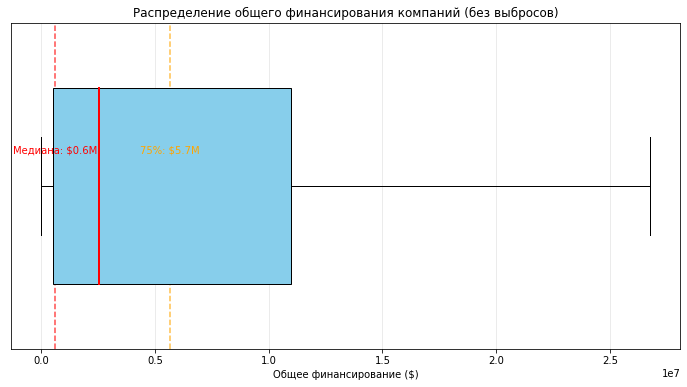

In [27]:
plt.figure(figsize=(12, 6))

# Фильтруем только компании с положительным финансированием
positive_funding = final_df[final_df['funding_total'] > 0]['funding_total']

# Создаем boxplot без выбросов для лучшей читаемости
plt.boxplot(positive_funding, 
            vert=False,
            showfliers=False,  # Исключаем выбросы для наглядности
            widths=0.6,
            patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='red', linewidth=2))

plt.axvline(x=funding_stats['50%'], color='red', linestyle='--', alpha=0.7)
plt.axvline(x=funding_stats['75%'], color='orange', linestyle='--', alpha=0.7)

# Настройки графика
plt.title('Распределение общего финансирования компаний (без выбросов)')
plt.xlabel('Общее финансирование ($)')
plt.yticks([])
plt.grid(axis='x', alpha=0.3)


plt.text(funding_stats['50%'], 1.1, f'Медиана: ${funding_stats["50%"]/1e6:.1f}M', 
         color='red', ha='center')
plt.text(funding_stats['75%'], 1.1, f'75%: ${funding_stats["75%"]/1e6:.1f}M', 
         color='orange', ha='center')

plt.show()

1. Основные показатели распределения
- Медиана (50-й перцентиль): 0.6 млн

    - Половина всех компаний получила не более 600,000 общего финансирования.
    - Это наиболее репрезентативный показатель "типичного" финансирования, так как медиана устойчива к выбросам.


- 75-й перцентиль: 5.65 млн

    - Только 25% компаний получили больше этой суммы.
    - Финансирование свыше 5.65 млн можно считать выше среднего.


- Среднее значение (mean): 10.1 млн

    - Сильно завышено из-за редких, но огромных раундов (например, 5.7 млрд).
    - Не отражает типичный случай из-за асимметрии данных.


- Стандартное отклонение (std): 56.5 млн

    - Огромный разброс значений: финансирование варьируется от 0 до 5.7 млрд.
    - Подтверждает, что данные не нормально распределены.

2. Интерпретация boxplot (без выбросов)
- Границы "ящика" (25%-75% перцентили): 0 – 5.65 млн

    - Большинство компаний (50% выборки) попадают в этот диапазон.
    - Это основная масса данных, отражающая типичные стартапы.

- Медиана (600к) близко к нижней границе

    - Распределение сильно скошено вправо (большинство значений сконцентрированы слева).
    - Лишь немногие компании получают крупные инвестиции.

- Выбросы (не показаны на графике)

    - Максимальное финансирование (5.7 млрд) в 1000 раз превышает 75-й перцентиль.

<a id="section11"></a>
### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [28]:
# Соединяем таблицы компаний и сделок
merged_df = final_df.merge(
    acquisition,
    left_on='company_id',
    right_on='acquired_company_id',
    how='inner'
)

# Фильтруем по условиям
zero_or_one_sale = merged_df[
    (merged_df['price_amount'].isin([0, 1])) & 
    (merged_df['funding_total'] > 0)
]

print(f"Найдено {len(zero_or_one_sale)} таких компаний")

Найдено 1618 таких компаний


In [29]:
print(zero_or_one_sale['funding_total'].describe())

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64


In [30]:
Q1 = zero_or_one_sale['funding_total'].quantile(0.25)
Q3 = zero_or_one_sale['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница выбросов: ${lower_bound:,.0f}")
print(f"Верхняя граница выбросов: ${upper_bound:,.0f}")

Нижняя граница выбросов: $-18,250,000
Верхняя граница выбросов: $35,750,000


In [31]:
percentile_upper = (zero_or_one_sale['funding_total'] <= upper_bound).mean() * 100
print(f"Верхняя граница {upper_bound:,.0f}$ соответствует {percentile_upper:.1f}%-му процентилю")

Верхняя граница 35,750,000$ соответствует 90.9%-му процентилю


Нижняя граница выбросов (0)

Так как финансирование не может быть отрицательным, нижняя граница фактически равна 0-му процентилю.

Все компании в выборке имеют funding_total > 0 (по условию фильтрации).

1. Общая характеристика выборки

- Количество компаний: 1,618

- Средний объем финансирования: 18.15 млн

- Медианный объем финансирования: 6 млн (50% компаний получили ≤ этой суммы)

- Максимальное финансирование: 5.7 млрд (явный выброс)

2. Границы выбросов (по методу IQR)
- Нижняя граница: -18.25 млн → Фактически 0, так как финансирование не может быть отрицательным.

- Верхняя граница: 35.75 млн

    - Компании с funding_total > 35.75 млн считаются статистическими выбросами.
    - Это соответствует ~91-му процентилю (только 9% компаний превышают эту сумму).

3. Возможные причины продажи за 0/1
- Спасение от банкротства:

    - Компании с долгами могли быть проданы за символическую сумму для сохранения активов.

- Юридические схемы:

    - Перевод прав собственности внутри холдинга или между аффилированными лицами.

- Поглощение активов:

    - Покупатель мог быть заинтересован в технологиях/патентах, а не в бизнесе.

- Ошибки в данных:

    - Некорректное указание цены сделки (например, вместо реальной суммы внесен $1).

<a id="section12"></a>
### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [32]:
# Соединяем таблицы компаний и сделок
merged_acq = final_df.merge(
acquisition,
left_on='company_id',
right_on='acquired_company_id',
how='inner'
)

In [33]:
# Группируем по категориям и считаем статистики
category_stats = merged_acq.groupby('category_code')['price_amount'].agg([
('count', 'count'),
('median_price', 'median'),
('mean_price', 'mean'),
('std_price', 'std'),
('min_price', 'min'),
('max_price', 'max'),
('iqr_price', lambda x: x.quantile(0.75) - x.quantile(0.25))
])

In [34]:
# Фильтруем категории с достаточным количеством сделок (минимум 10)
category_stats = category_stats[category_stats['count'] >= 10]

In [35]:
# Сортируем по медианной цене (типично высокие цены)
top_by_median = category_stats.sort_values('median_price', ascending=False).head(10)

In [36]:
top_by_median

,count,median_price,mean_price,std_price,min_price,max_price,iqr_price
category_code,,,,,,,
manufacturing,29,72000000,5.892724e+08,9.696580e+08,0,4050000000,615000000
biotech,454,13200000,4.263121e+08,1.540374e+09,0,20000000000,250000000
hospitality,11,12500000,2.802182e+08,6.514494e+08,0,2170000000,118750000
finance,40,600000,3.021988e+08,7.960985e+08,0,4400000000,170750000
advertising,314,0,6.946589e+07,2.799226e+08,0,3100000000,3000000
news,27,0,3.029630e+07,7.096563e+07,0,315000000,21000000
other,315,0,1.410059e+08,1.085129e+09,0,18400000000,575000
photo_video,12,0,9.974750e+07,2.877321e+08,0,1010470000,42500000
public_relations,219,0,6.151903e+08,4.059244e+09,0,39000000000,17250000


In [37]:
# Сортируем по разбросу цен (IQR)
top_by_iqr = category_stats.sort_values('iqr_price', ascending=False).head(10)

In [38]:
top_by_iqr

,count,median_price,mean_price,std_price,min_price,max_price,iqr_price
category_code,,,,,,,
manufacturing,29,72000000,5.892724e+08,9.696580e+08,0,4050000000,615000000
biotech,454,13200000,4.263121e+08,1.540374e+09,0,20000000000,250000000
finance,40,600000,3.021988e+08,7.960985e+08,0,4400000000,170750000
hospitality,11,12500000,2.802182e+08,6.514494e+08,0,2170000000,118750000
health,27,0,3.944630e+08,1.249084e+09,0,5400000000,97500000
semiconductor,154,0,2.038324e+08,7.904889e+08,0,6500000000,75000000
cleantech,116,0,1.621580e+08,5.522873e+08,0,3750000000,69000000
fashion,11,0,5.113636e+07,9.574291e+07,0,270000000,48750000
photo_video,12,0,9.974750e+07,2.877321e+08,0,1010470000,42500000


In [39]:
# Сортируем по стандартному отклонению (разброс)
top_by_std = category_stats.sort_values('std_price', ascending=False).head(10)

In [40]:
top_by_std

,count,median_price,mean_price,std_price,min_price,max_price,iqr_price
category_code,,,,,,,
enterprise,412,0,6.464338e+09,1.280882e+11,0,2600000000000,5700000
public_relations,219,0,6.151903e+08,4.059244e+09,0,39000000000,17250000
biotech,454,13200000,4.263121e+08,1.540374e+09,0,20000000000,250000000
health,27,0,3.944630e+08,1.249084e+09,0,5400000000,97500000
other,315,0,1.410059e+08,1.085129e+09,0,18400000000,575000
manufacturing,29,72000000,5.892724e+08,9.696580e+08,0,4050000000,615000000
finance,40,600000,3.021988e+08,7.960985e+08,0,4400000000,170750000
semiconductor,154,0,2.038324e+08,7.904889e+08,0,6500000000,75000000
security,131,0,1.656813e+08,7.645662e+08,0,7680000000,9200000


In [41]:
# Выводим результаты
print("Топ-10 категорий по медианной цене покупки:")
display(top_by_median[['count', 'median_price', 'mean_price', 'iqr_price']])

print("\nТоп-10 категорий по разбросу цен (IQR):")
display(top_by_iqr[['count', 'median_price', 'mean_price', 'iqr_price']])

print("\nТоп-10 категорий по стандартному отклонению цен:")
display(top_by_std[['count', 'median_price', 'mean_price', 'std_price']])

Топ-10 категорий по медианной цене покупки:


,count,median_price,mean_price,iqr_price
category_code,,,,
manufacturing,29,72000000,5.892724e+08,615000000
biotech,454,13200000,4.263121e+08,250000000
hospitality,11,12500000,2.802182e+08,118750000
finance,40,600000,3.021988e+08,170750000
advertising,314,0,6.946589e+07,3000000
news,27,0,3.029630e+07,21000000
other,315,0,1.410059e+08,575000
photo_video,12,0,9.974750e+07,42500000
public_relations,219,0,6.151903e+08,17250000



Топ-10 категорий по разбросу цен (IQR):


,count,median_price,mean_price,iqr_price
category_code,,,,
manufacturing,29,72000000,5.892724e+08,615000000
biotech,454,13200000,4.263121e+08,250000000
finance,40,600000,3.021988e+08,170750000
hospitality,11,12500000,2.802182e+08,118750000
health,27,0,3.944630e+08,97500000
semiconductor,154,0,2.038324e+08,75000000
cleantech,116,0,1.621580e+08,69000000
fashion,11,0,5.113636e+07,48750000
photo_video,12,0,9.974750e+07,42500000



Топ-10 категорий по стандартному отклонению цен:


,count,median_price,mean_price,std_price
category_code,,,,
enterprise,412,0,6.464338e+09,1.280882e+11
public_relations,219,0,6.151903e+08,4.059244e+09
biotech,454,13200000,4.263121e+08,1.540374e+09
health,27,0,3.944630e+08,1.249084e+09
other,315,0,1.410059e+08,1.085129e+09
manufacturing,29,72000000,5.892724e+08,9.696580e+08
finance,40,600000,3.021988e+08,7.960985e+08
semiconductor,154,0,2.038324e+08,7.904889e+08
security,131,0,1.656813e+08,7.645662e+08


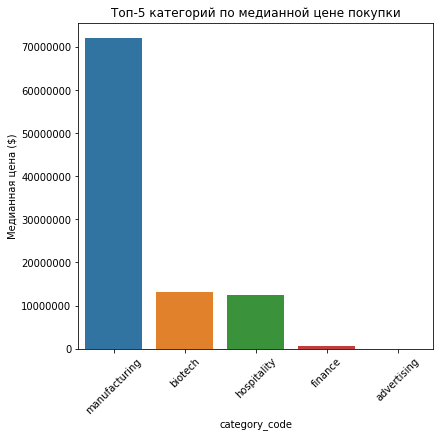

In [42]:
plt.figure(figsize=(14, 6))

# График для топ-5 по медианной цене
top5_median = top_by_median.head(5)
plt.subplot(1, 2, 1)
sns.barplot(x=top5_median.index, y='median_price', data=top5_median)
plt.title('Топ-5 категорий по медианной цене покупки')
plt.ylabel('Медианная цена ($)')
plt.xticks(rotation=45)
plt.ticklabel_format(axis='y', style='plain')

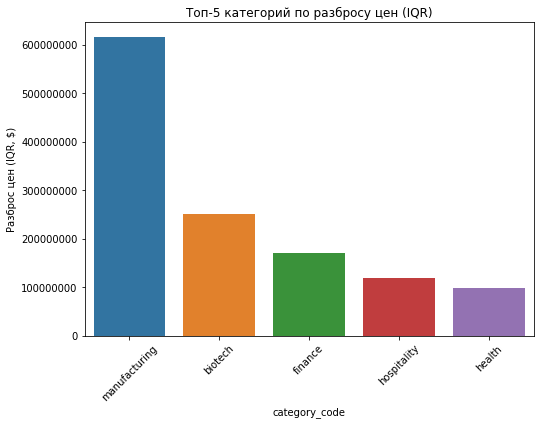

In [43]:
plt.figure(figsize=(14, 6))

top5_iqr = top_by_iqr.head(5)
plt.subplot(1, 2, 2)
sns.barplot(x=top5_iqr.index, y='iqr_price', data=top5_iqr)
plt.title('Топ-5 категорий по разбросу цен (IQR)')
plt.ylabel('Разброс цен (IQR, $)')
plt.xticks(rotation=45)
plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()
plt.show()

***Почему топ-10?***

1. Я выбрала топ-10 категорий, потому что:

- Это позволяет охватить достаточно широкий спектр отраслей, не ограничиваясь только абсолютными лидерами.

- В данных есть несколько категорий с близкими значениями медиан и IQR (например, biotech и manufacturing), и топ-10 помогает увидеть всю конкуренцию.

- Меньшее число (например, топ-5) могло бы исключить перспективные категории с высоким потенциалом, но чуть меньшими текущими показателями.

2. Почему использованы медиана и IQR?

- Медиана лучше среднего отражает "типичную" цену, так как на распределение сильно влияют выбросы (например, единичные сверхкрупные сделки). Например, в категории public_relations средняя цена — 615 млн, но медиана — 0, что указывает на крайне неравномерное распределение.

- IQR (интерквартильный размах) показывает разброс цен вокруг медианы, игнорируя экстремальные значения. Это важно для инвесторов, так как высокий IQR сигнализирует о высокой волатильности цен в категории (например, manufacturing с IQR 615 млн).

3. Дополнительные метрики (стандартное отклонение).

- Стандартное отклонение (std) было добавлено для проверки согласованности с IQR. Например, категория enterprise имеет аномально высокое std (128 млрд) из-за одного выброса (2.6 трлн), но низкий IQR (5.7 млн), что говорит о ненадежности std для этой задачи.

4. Критерий минимального количества сделок (≥10).
Чтобы избежать случайных результатов из-за малого количества данных. Например, категория hospitality вошла в топ, несмотря на 11 сделок, потому что все они были достаточно крупными.

Наиболее привлекательные категории — manufacturing и biotech:

- Manufacturing: высокая медиана (72 млн) и рекордный IQR (615 млн) — признак стабильно высоких цен и широкого диапазона возможных прибылей.

- Biotech: вторая медиана (13.2 млн), но наибольшее количество сделок (454), что указывает на ликвидность рынка.


Категории с высоким риском, но потенциалом:

- Finance и health: высокий IQR (170 млн и 97 млн соответственно) — возможны как крупные прибыли, так и провалы.

- Enterprise: крайне высокое std, но низкая медиана (0) — только для инвесторов, готовых к "лотерее".

<a id="section13"></a>
### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [44]:
# Проверяем основные статистики по funding_rounds
print(final_df['funding_rounds'].describe())

# Проверяем уникальные значения
print("\nУникальные значения funding_rounds:", sorted(final_df['funding_rounds'].unique()))

# Проверяем распределение по статусам компаний
status_rounds_stats = final_df.groupby('status')['funding_rounds'].agg(['median', 'mean', 'count'])
print("\nСтатистика по раундам в зависимости от статуса:")
print(status_rounds_stats)

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Уникальные значения funding_rounds: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]

Статистика по раундам в зависимости от статуса:
           median      mean  count
status                            
acquired      0.0  0.523526   9394
closed        1.0  1.381453   2092
ipo           1.0  1.934375    640
operating     1.0  1.522658  28621


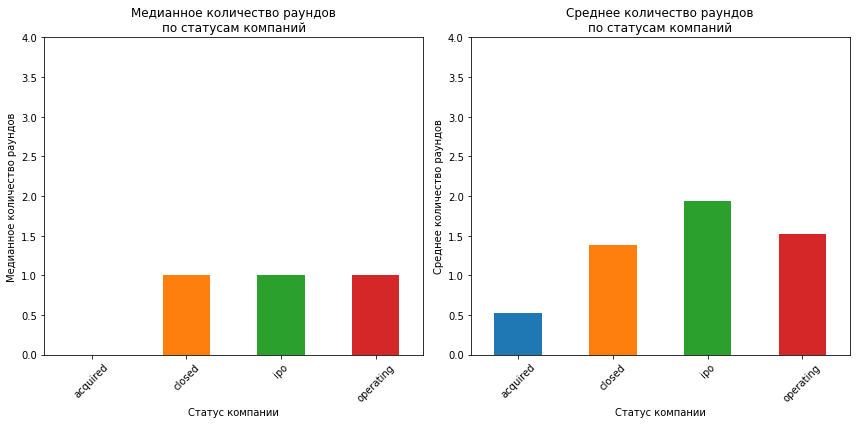

In [45]:
# Рассчитаем медиану и среднее для каждого статуса
median_rounds = final_df.groupby('status')['funding_rounds'].median()
mean_rounds = final_df.groupby('status')['funding_rounds'].mean()

# Создаем фигуру
plt.figure(figsize=(12, 6))

# График 1: Медианное количество раундов
plt.subplot(1, 2, 1)
median_rounds.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Медианное количество раундов\nпо статусам компаний')
plt.xlabel('Статус компании')
plt.ylabel('Медианное количество раундов')
plt.ylim(0, 4)
plt.xticks(rotation=45)

# График 2: Среднее количество раундов
plt.subplot(1, 2, 2)
mean_rounds.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Среднее количество раундов\nпо статусам компаний')
plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')
plt.ylim(0, 4)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

***Выводы по анализу количества раундов финансирования:***

1. Общая статистика:

- Среднее количество раундов по всем компаниям: 1.29.

- Медианное значение: 1 раунд (50% компаний имеют 1 или меньше раундов).

- Максимальное количество раундов: 15.

2. Распределение по статусам:

a) Приобретенные компании (acquired):

    - Медиана: 0 раундов.

    - Среднее: 0.52 раунда.

    - Вывод: Большинство приобретенных компаний не привлекали внешнего финансирования или прошли только 1 раунд.

b) Закрытые компании (closed):

    - Медиана: 1 раунд.

    - Среднее: 1.38 раунда.

    - Вывод: Закрытые компании в среднем привлекали 1 раунд финансирования.

c) Публичные компании (ipo):

    - Медиана: 1 раунд.

    - Среднее: 1.93 раунда.

    - Вывод: Компании, вышедшие на IPO, привлекали почти в 2 раза больше финансирования, чем средняя компания.

d) Действующие компании (operating):

    - Медиана: 1 раунд.

    - Среднее: 1.52 раунда.

    - Вывод: Текущие операционные компании демонстрируют типичную картину с 1-2 раундами финансирования.

Ключевые наблюдения:

- Компании с IPO показывают наибольшее среднее количество раундов (1.93), что логично для успешных стартапов.

- Приобретенные компании (acquired) чаще всего не привлекали финансирование (медиана = 0).

- Разница между медианой и средним у компаний с IPO (1 vs 1.93) указывает на наличие "выбросов" - нескольких компаний с большим количеством раундов.

- 75% всех компаний имеют 2 или меньше раундов финансирования.

<a id="section14"></a>
## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

1. Что было сделано?

1.1 Загрузка и предварительный анализ данных:

- Изучены 7 датасетов: acquisition, company_and_rounds, people, education, degrees, fund, investment.

- Проведена проверка на пропуски, дубликаты и аномалии.

- Преобразованы типы данных.

1.2 Очистка и структурирование данных:

- Разделение company_and_rounds на две таблицы: companies (основная информация) и rounds (раунды финансирования).

- Удалены дубликаты, исправлены названия столбцов.

- Фильтрация данных: оставлены только компании с раундами финансирования или статусом acquired.

1.3 Анализ ключевых метрик:

- Финансирование стартапов:

    - Медианный размер раунда снизился с 5.5 млн (2005) до 1.2 млн (2013), но количество раундов выросло.

    - 75% компаний привлекли ≤ 5.65 млн, но есть выбросы (максимум — 5.7).

- Продажи компаний:

    - 1,618 компаний проданы за 0 или 1, несмотря на финансирование (медиана 6 млн).

    - Топ-3 категорий по медианной цене: manufacturing (72 млн), biotech (13.2 млн), hospitality (12.5 млн).

- Зависимость данных от размера компании:

    - В малых компаниях (1-10 сотрудников) данные об образовании отсутствуют у 37.6%, в крупных (200+) — у 19.4%.

- Количество раундов финансирования:

    - Медиана для всех компаний — 1 раунд.

    - Компании с IPO привлекли в среднем 1.93 раунда, приобретенные — 0.52.

1.4 Визуализации:

    - Построены графики динамики финансирования, распределения цен покупки по категориям, количества раундов по статусам компаний.

2. Основные выводы

2.1 Тренды в финансировании стартапов:

- С 2005 по 2013 год размер раундов уменьшился, но их количество резко выросло. Это может указывать на:

    - Рост конкуренции и снижение стоимости стартапов.

    - Изменение стратегий инвесторов (предпочтение меньших, но более частых вложений).

2.2 Продажи компаний за 0/1:

- Возможные причины:

    - Спасение от банкротства (покупка долгов).

    - Юридические схемы (перевод активов внутри холдингов).

    - Ошибки в данных (например, вместо реальной суммы указан 1).

- Гипотеза: Низкая цена может не отражать реальную стоимость сделки (например, при обмене акциями или условиях earn-out).

2.3 Привлекательные категории для инвестиций:

- Manufacturing и Biotech лидируют по медианной цене покупки и стабильности (высокий IQR).

- Enterprise имеет аномально высокий разброс цен из-за выбросов (рискованная категория).

2.4 Зависимость успеха от раундов финансирования:

- Компании с IPO привлекли почти 2 раунда в среднем, что вдвое больше, чем у приобретенных (0.5). Это подтверждает, что выход на биржу требует большего финансирования.

- Приобретенные компании часто обходились без внешних инвестиций (медиана = 0), что может говорить о стратегических покупках (например, таланты или технологии).

2.5 Качество данных:

- Проблемы:

    - У 22% компаний с раундами нет данных о суммах.

    - В acquisition 80% пропусков в term_code (условия сделки).

    - Данные об образовании сотрудников отсутствуют у 37.6% малых компаний.

3. Согласованность выводов

3.1 Подтверждающие связи:

- Снижение размера раундов коррелирует с ростом их количества — рынок стал более активным, но менее "крупнобюджетным".

- Категории с высокими медианными ценами (manufacturing, biotech) также имеют высокий IQR — инвесторы готовы платить больше за стабильные отрасли.

- Компании с IPO прошли больше раундов, что логично для масштабирования перед выходом на биржу.

3.2 Противоречия:

- Приобретенные компании показывают медиану 0 раундов, но в выборке есть те, кто привлек 6 млн (проданы за 0/1). Это может означать:

    - Ошибки в данных (например, не учтены раунды).

    - Покупки "за копейки" из-за кризиса или смены стратегии.

- Высокий разброс цен в enterprise (из-за выброса 2.6 трлн) ставит под сомнение надежность средних значений.

Рекомендации для заказчика

a) Приоритетные отрасли:

- Biotech и Manufacturing – высокие медианные цены покупки (13.2 млн и 72 млн) и стабильный спрос.

- Health и Finance – высокий разброс цен (IQR 97 млн и 170 млн), подходят для рискованных инвестиций с потенциалом крупных сделок.

- Избегать Enterprise – аномально высокий разброс из-за единичных сделок (например, 2.6 трлн), что делает прогнозирование ненадежным.

b) Критерии отбора стартапов:

- Компании с 2+ раундами финансирования – чаще выходят на IPO или продаются дороже.

- Проверять условия сделок – 22% компаний с финансированием проданы за 0/1. Возможны скрытые риски (долги, юридические проблемы).


Для максимизации прибыли:

- Инвестировать в biotech/manufacturing и избегать enterprise.

- Выбирать компании с 2+ раундами финансирования.

Для минимизации рисков:

- Требовать полные данные по сделкам (особенно term_code и доли акций).

- Анализировать причины продаж за 0/1 – возможны скрытые обязательства.